In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
def combine_experiment_results(results_dir, experiments_list, note = ''):
    # Initialize a list to store dataframes for each experiment
    all_dfs = []

    # Define columns that are constant across seeds
    constant_columns = [
        'ID','Sex', 'Age', 'Label', 'Compressed_sensing', 'Base_Name',
        'region_based_label',
        'total_comparisons_label_and_acquisition_non_cs',
        'total_comparisons_acquisition_non_cs',
        'total_comparisons_acquisition_cs'
    ]
    
    # Define columns that vary across seeds
    variable_columns = [
        'anomaly_score', 'std_anomaly_score', 'region_based_score', 'SEED',
        'perm_p_values_non_cs_group', 'perm_p_values_cs_group',
        'perm_p_values_non_cs_label', 'perm_p_values_cs_label',
        'count_lower_diff_label_and_acquisition_non_cs',
        'count_lower_diff_label_and_acquisition_cs',
        'count_lower_diff_acquisition_non_cs',
        'count_lower_diff_acquisition_cs'
    ]

    for exp_path in experiments_list:
        exp_name = exp_path.split('/')[-1]
        seed = exp_name.split('_SEED_')[1].split('_')[0]
        df_seed = pd.read_csv(os.path.join(results_dir,exp_path, f'subject_df_with_anomaly_scores_{seed}{note}.csv'))
        
        
        # Add the SEED column
        df_seed['SEED'] = seed
        
        # Separate constant and variable columns
        constant_df = df_seed[constant_columns]
        variable_df = df_seed[variable_columns]

        # Add variable columns with seed suffix to avoid conflicts
        variable_df.columns = [f"{col}_SEED_{seed}" if col != 'SEED' else col for col in variable_df.columns]
        
        # Append to the list
        all_dfs.append(pd.concat([constant_df, variable_df], axis=1))

    # Concatenate all DataFrames horizontally
    combined_df = pd.concat(all_dfs, axis=1)
    print(combined_df.columns)
    # Drop duplicate constant columns (keeping the first occurrence)
    combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]

    return combined_df

In [4]:
experiments_list = [
    'simple_conv/masked_slice/20240530-1325_simple_conv_masked_slice_SSL_lr1.000e-03-e1500-bs8-gf_dim8-daFalse__SEED_5_2Dslice__without_rotation_with_cs_skip_updated_ao_S10_balanced_decreased_interpolation_factor_cube_3',
    'simple_conv/masked_slice/20240530-1331_simple_conv_masked_slice_SSL_lr1.000e-03-e1500-bs8-gf_dim8-daFalse__SEED_10_2Dslice__without_rotation_with_cs_skip_updated_ao_S10_balanced_decreased_interpolation_factor_cube_3',
    'simple_conv/masked_slice/20240530-1342_simple_conv_masked_slice_SSL_lr1.000e-03-e1500-bs8-gf_dim8-daFalse__SEED_15_2Dslice__without_rotation_with_cs_skip_updated_ao_S10_balanced_decreased_interpolation_factor_cube_3',
    'simple_conv/masked_slice/20240530-1344_simple_conv_masked_slice_SSL_lr1.000e-03-e1500-bs8-gf_dim8-daFalse__SEED_20_2Dslice__without_rotation_with_cs_skip_updated_ao_S10_balanced_decreased_interpolation_factor_cube_3',
    'simple_conv/masked_slice/20240530-1347_simple_conv_masked_slice_SSL_lr1.000e-03-e1500-bs8-gf_dim8-daFalse__SEED_25_2Dslice__without_rotation_with_cs_skip_updated_ao_S10_balanced_decreased_interpolation_factor_cube_3'
    ]

results_dir = '/usr/bmicnas02/data-biwi-01/jeremy_students/lschlyter/4dflowmri_anomaly_detection/Results/Evaluation'

combined_df = combine_experiment_results(results_dir, experiments_list, note='')
# Set the ID as the index
combined_df.set_index('ID', inplace=True)



Index(['ID', 'Sex', 'Age', 'Label', 'Compressed_sensing', 'Base_Name',
       'region_based_label', 'total_comparisons_label_and_acquisition_non_cs',
       'total_comparisons_acquisition_non_cs',
       'total_comparisons_acquisition_cs',
       ...
       'region_based_score_SEED_25', 'SEED',
       'perm_p_values_non_cs_group_SEED_25', 'perm_p_values_cs_group_SEED_25',
       'perm_p_values_non_cs_label_SEED_25', 'perm_p_values_cs_label_SEED_25',
       'count_lower_diff_label_and_acquisition_non_cs_SEED_25',
       'count_lower_diff_label_and_acquisition_cs_SEED_25',
       'count_lower_diff_acquisition_non_cs_SEED_25',
       'count_lower_diff_acquisition_cs_SEED_25'],
      dtype='object', length=110)


In [5]:
combined_df_obs_lower_than = combine_experiment_results(results_dir, experiments_list, note='_obs_lower_than')
# Set the ID as the index
combined_df_obs_lower_than.set_index('ID', inplace=True)

Index(['ID', 'Sex', 'Age', 'Label', 'Compressed_sensing', 'Base_Name',
       'region_based_label', 'total_comparisons_label_and_acquisition_non_cs',
       'total_comparisons_acquisition_non_cs',
       'total_comparisons_acquisition_cs',
       ...
       'region_based_score_SEED_25', 'SEED',
       'perm_p_values_non_cs_group_SEED_25', 'perm_p_values_cs_group_SEED_25',
       'perm_p_values_non_cs_label_SEED_25', 'perm_p_values_cs_label_SEED_25',
       'count_lower_diff_label_and_acquisition_non_cs_SEED_25',
       'count_lower_diff_label_and_acquisition_cs_SEED_25',
       'count_lower_diff_acquisition_non_cs_SEED_25',
       'count_lower_diff_acquisition_cs_SEED_25'],
      dtype='object', length=110)


### Plot the anomaly scores of all subjects across seeds, as well as the duplicates

/tmp/ipykernel_21404/2315317492.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=combined_df_sorted.index, y='anomaly_score_mean', data=combined_df_sorted, hue='Acquisition_Method',


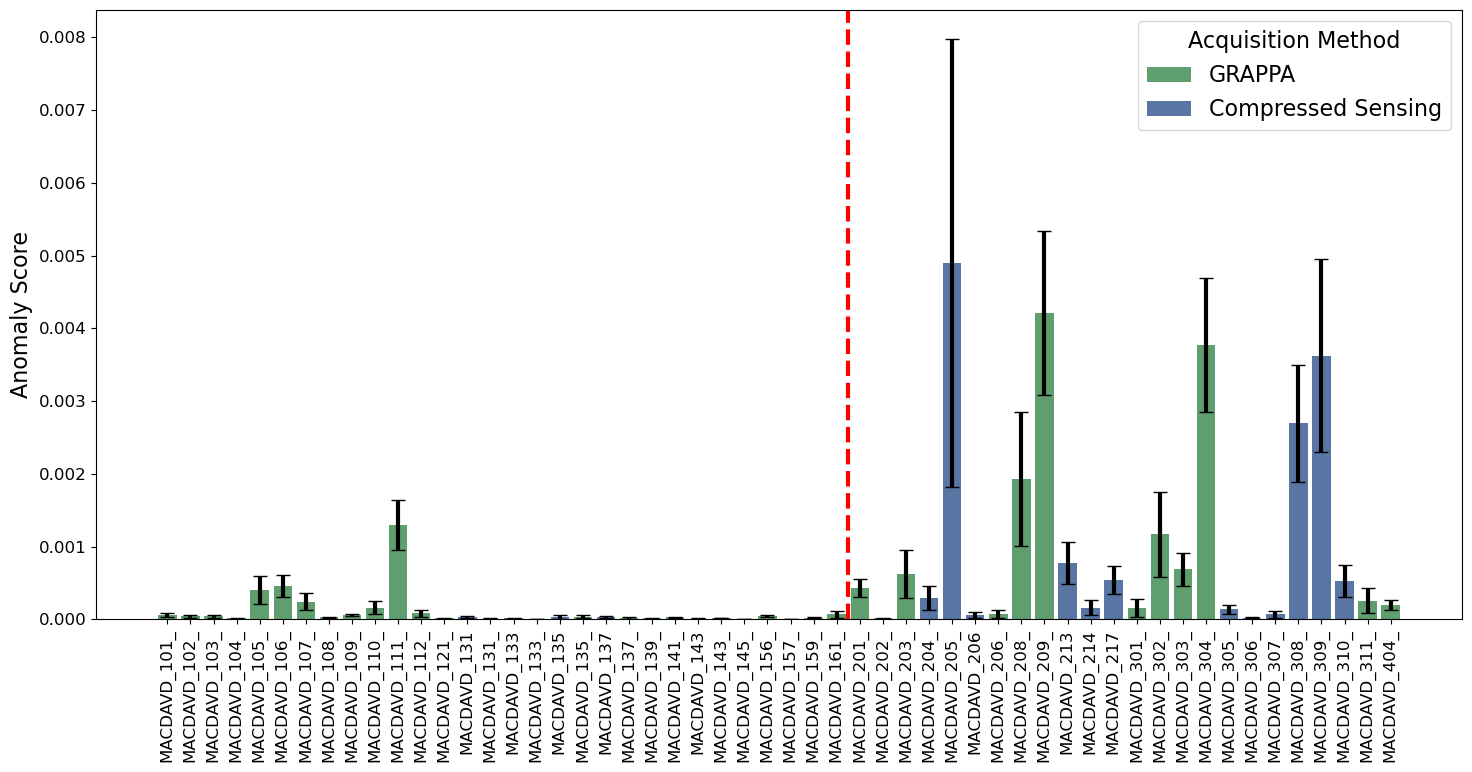

/tmp/ipykernel_21404/2315317492.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=combined_df_duplicates.index, y='anomaly_score_mean', data=combined_df_duplicates, hue='Acquisition_Method',


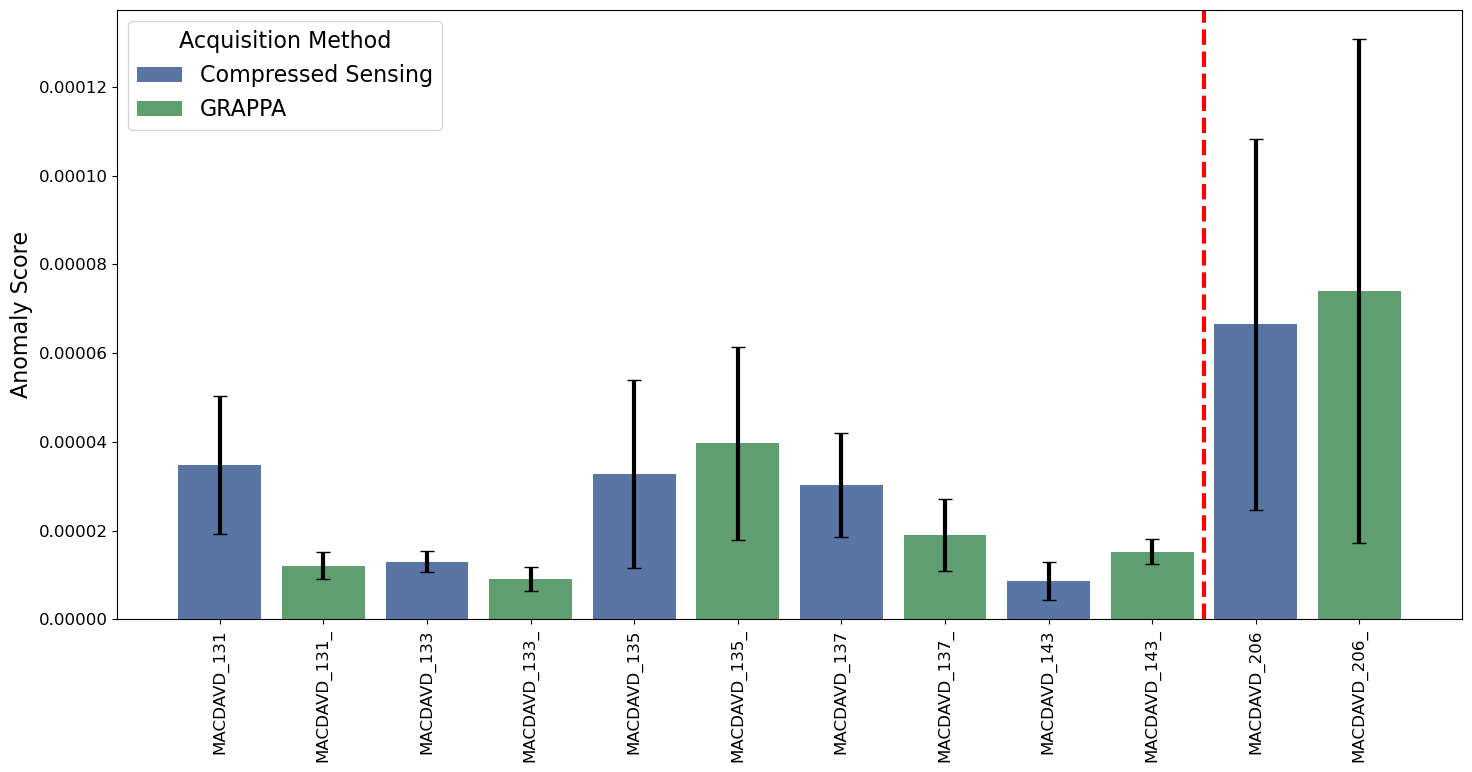

In [5]:
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 16
seeds = [5, 10, 15, 20, 25]
anomaly_score_cols = [f'anomaly_score_SEED_{seed}' for seed in seeds]

combined_df['anomaly_score_mean'] = combined_df[anomaly_score_cols].mean(axis=1)
combined_df['anomaly_score_std'] = combined_df[anomaly_score_cols].std(axis=1)
combined_df['Acquisition_Method'] = combined_df['Compressed_sensing'].map({True: 'Compressed Sensing', False: 'GRAPPA'})

# Sort the DataFrame based on labels to separate controls and cases
combined_df_sorted = combined_df.sort_values(by=['Base_Name', 'Label'])

# Define a custom palette
custom_palette = {'Male': '#ABC8E2', 'Female': '#F4BE9F', 'Cases': '#C9A9E5', 'Controls': '#A7D8A2'}
custom_cs_palette = {True: '#4C72B0', False: '#55A868', 'Compressed Sensing': '#4C72B0', 'Sequential': '#55A868', 'GRAPPA': '#55A868'}

# Identify the position to separate controls and cases
separator_position = combined_df_sorted[combined_df_sorted['Label'] == 'Cases'].index[0]

# Plot anomaly scores for all subjects
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=combined_df_sorted.index, y='anomaly_score_mean', data=combined_df_sorted, hue='Acquisition_Method', 
                 palette=custom_cs_palette, dodge=False, ci=None)
ax.errorbar(combined_df_sorted.index, combined_df_sorted['anomaly_score_mean'], yerr=combined_df_sorted['anomaly_score_std'], 
            fmt='none', c='black', capsize=5)

plt.axvline(x=combined_df_sorted.index.get_loc(separator_position) - 0.5, color='red', linestyle='--')
plt.xticks(rotation=90)
plt.xlabel('')
plt.legend(title='Acquisition Method')
plt.ylabel('Anomaly Score')
plt.tight_layout()
plt.show()

# Extract duplicates
combined_df_duplicates = combined_df_sorted[combined_df_sorted.duplicated('Base_Name', keep=False)].sort_values('Base_Name')
separator_position = combined_df_duplicates[combined_df_duplicates['Label'] == 'Cases'].index[0]

plt.figure(figsize=(15, 8))
ax = sns.barplot(x=combined_df_duplicates.index, y='anomaly_score_mean', data=combined_df_duplicates, hue='Acquisition_Method', 
                 palette=custom_cs_palette, dodge=False, ci=None)
ax.errorbar(combined_df_duplicates.index, combined_df_duplicates['anomaly_score_mean'], yerr=combined_df_duplicates['anomaly_score_std'], 
            fmt='none', c='black', capsize=5)

plt.axvline(x=combined_df_duplicates.index.get_loc(separator_position) - 0.5, color='red', linestyle='--')
plt.xticks(rotation=90)
plt.xlabel('')
plt.legend(title='Acquisition Method')
plt.ylabel('Anomaly Score')
plt.tight_layout()
plt.show()


### Experimental: Test-Retest 

Trying different ways other than permutation to assess test-retest reliability 

In [9]:
exp_path = experiments_list[0]
exp_name = exp_path.split('/')[-1]
seed = exp_name.split('_SEED_')[1].split('_')[0]
print(seed)
df_5 = pd.read_csv(os.path.join(results_dir,exp_path, f'subject_df_with_anomaly_scores_{seed}.csv'))
df_5.head()


5


,ID,Sex,Age,Label,Compressed_sensing,anomaly_score,std_anomaly_score,region_based_label,region_based_score,SEED,...,perm_p_values_non_cs_label,perm_p_values_cs_label,count_lower_diff_label_and_acquisition_non_cs,total_comparisons_label_and_acquisition_non_cs,count_lower_diff_label_and_acquisition_cs,total_comparisons_label_and_acquisition_cs,count_lower_diff_acquisition_non_cs,total_comparisons_acquisition_non_cs,count_lower_diff_acquisition_cs,total_comparisons_acquisition_cs
0,MACDAVD_131,Female,26.0,Controls,True,0.000059,0.000732,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]","[1.2174264e-05, 1.1726092e-05, 4.2374277e-06, ...",5,...,0.5295,0.1950,12.0,24.0,4.0,4.0,13.0,36.0,6.0,16.0
1,MACDAVD_133,Female,25.0,Controls,True,0.000012,0.000351,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2.921091e-06, 3.5542594e-06, 1.4185175e-06, 1...",5,...,0.7665,0.8040,6.0,24.0,1.0,4.0,7.0,36.0,1.0,16.0
2,MACDAVD_135,Male,41.0,Controls,True,0.000038,0.001064,NaN,NaN,5,...,1.0000,1.0000,0.0,24.0,0.0,4.0,0.0,36.0,0.0,16.0
3,MACDAVD_137,Male,31.0,Controls,True,0.000028,0.000688,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2.3352163e-06, 2.913353e-06, 1.5610702e-06, 3...",5,...,1.0000,1.0000,0.0,24.0,0.0,4.0,0.0,36.0,0.0,16.0
4,MACDAVD_143,Male,29.0,Controls,True,0.000005,0.000078,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2.231528e-06, 2.6717187e-06, 9.103646e-07, 8....",5,...,0.7995,0.8035,5.0,24.0,1.0,4.0,5.0,36.0,1.0,16.0


In [15]:
df_5.columns

Index(['ID', 'Sex', 'Age', 'Label', 'Compressed_sensing', 'anomaly_score',
       'std_anomaly_score', 'region_based_label', 'region_based_score', 'SEED',
       'Base_Name', 'perm_p_values_non_cs_group', 'perm_p_values_cs_group',
       'perm_p_values_non_cs_label', 'perm_p_values_cs_label',
       'count_lower_diff_label_and_acquisition_non_cs',
       'total_comparisons_label_and_acquisition_non_cs',
       'count_lower_diff_label_and_acquisition_cs',
       'total_comparisons_label_and_acquisition_cs',
       'count_lower_diff_acquisition_non_cs',
       'total_comparisons_acquisition_non_cs',
       'count_lower_diff_acquisition_cs', 'total_comparisons_acquisition_cs'],
      dtype='object')

In [18]:
# Filter only subjects with duplicates (both GRAPPA and CS scans)
df_duplicates = df_5.groupby('Base_Name').filter(lambda x: len(x) == 2)

# Check if each subject has both acquisition methods (GRAPPA and CS)
df_duplicates.pivot(index='Base_Name', columns='Compressed_sensing', values='anomaly_score')

# Calculate ICC for duplicates (between GRAPPA and CS scores)
import pingouin as pg

icc_result = pg.intraclass_corr(data=df_duplicates, targets='Base_Name', raters='Compressed_sensing', ratings='anomaly_score')
print(icc_result)


    Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.502762  3.022217    5    6  0.105344   
1   ICC2     Single random raters  0.508030  3.158252    5    5  0.116295   
2   ICC3      Single fixed raters  0.519029  3.158252    5    5  0.116295   
3  ICC1k  Average raters absolute  0.669117  3.022217    5    6  0.105344   
4  ICC2k    Average random raters  0.673767  3.158252    5    5  0.116295   
5  ICC3k     Average fixed raters  0.683369  3.158252    5    5  0.116295   

           CI95%  
0  [-0.33, 0.91]  
1  [-0.29, 0.91]  
2  [-0.39, 0.92]  
3  [-0.98, 0.95]  
4  [-0.83, 0.95]  
5  [-1.26, 0.96]  


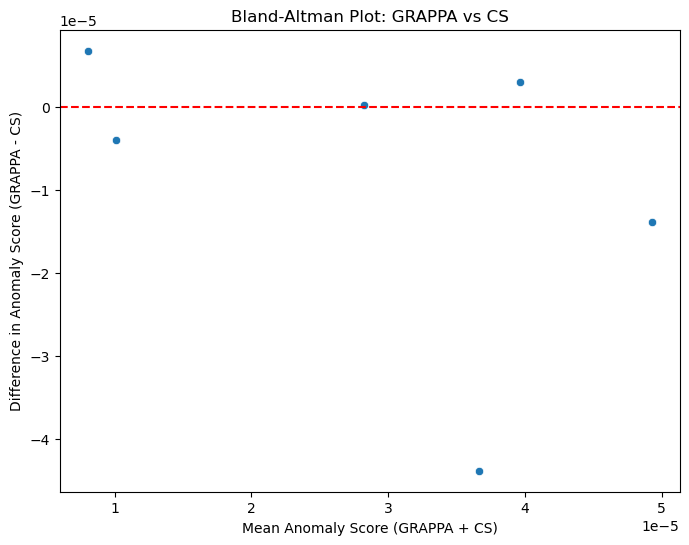

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Create mean and difference columns for Bland-Altman plot
df_duplicates = df_5.groupby('Base_Name').filter(lambda x: len(x) == 2)  # Select only duplicates
df_duplicates['Mean_score'] = df_duplicates.groupby('Base_Name')['anomaly_score'].transform('mean')
df_duplicates['Difference'] = df_duplicates.groupby('Base_Name')['anomaly_score'].diff()

# Bland-Altman plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Mean_score', y='Difference', data=df_duplicates)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Mean Anomaly Score (GRAPPA + CS)')
plt.ylabel('Difference in Anomaly Score (GRAPPA - CS)')
plt.title('Bland-Altman Plot: GRAPPA vs CS')
plt.show()

In [21]:
# Step 1: Compute the observed mean difference
observed_difference = df_duplicates.groupby('Base_Name').apply(
    lambda x: x.loc[x['Compressed_sensing'] == 0, 'anomaly_score'].values[0] -
              x.loc[x['Compressed_sensing'] == 1, 'anomaly_score'].values[0]
).mean()

# Step 2: Permutation Test
n_permutations = 10000
perm_diffs = np.zeros(n_permutations)

for i in range(n_permutations):
    # Shuffle the Compressed_sensing labels within each subject
    shuffled_scores = df_duplicates.groupby('Base_Name').apply(
        lambda x: x.sample(frac=1, replace=False)['anomaly_score'].values
    ).reset_index(drop=True)
    
    # Compute the mean difference for the shuffled data
    perm_diff = shuffled_scores.groupby(df_duplicates['Base_Name']).apply(
        lambda x: x.iloc[0] - x.iloc[1]
    ).mean()
    
    perm_diffs[i] = perm_diff

# Step 3: Compute the p-value
p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_difference))
print(f'Observed Difference: {observed_difference}')
print(f'P-value: {p_value}')

IndexError: single positional indexer is out-of-bounds

In [28]:
df_duplicates

,ID,Sex,Age,Label,Compressed_sensing,anomaly_score,std_anomaly_score,region_based_label,region_based_score,SEED,...,perm_p_values_non_cs_label,perm_p_values_cs_label,count_lower_diff_label_and_acquisition_non_cs,total_comparisons_label_and_acquisition_non_cs,count_lower_diff_label_and_acquisition_cs,total_comparisons_label_and_acquisition_cs,count_lower_diff_acquisition_non_cs,total_comparisons_acquisition_non_cs,count_lower_diff_acquisition_cs,total_comparisons_acquisition_cs
0,MACDAVD_131,Female,26.0,Controls,True,0.000059,0.000732,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]","[1.2174264e-05, 1.1726092e-05, 4.2374277e-06, ...",5,...,0.5295,0.1950,12.0,24.0,4.0,4.0,13.0,36.0,6.0,16.0
1,MACDAVD_133,Female,25.0,Controls,True,0.000012,0.000351,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2.921091e-06, 3.5542594e-06, 1.4185175e-06, 1...",5,...,0.7665,0.8040,6.0,24.0,1.0,4.0,7.0,36.0,1.0,16.0
2,MACDAVD_135,Male,41.0,Controls,True,0.000038,0.001064,NaN,NaN,5,...,1.0000,1.0000,0.0,24.0,0.0,4.0,0.0,36.0,0.0,16.0
3,MACDAVD_137,Male,31.0,Controls,True,0.000028,0.000688,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2.3352163e-06, 2.913353e-06, 1.5610702e-06, 3...",5,...,1.0000,1.0000,0.0,24.0,0.0,4.0,0.0,36.0,0.0,16.0
4,MACDAVD_143,Male,29.0,Controls,True,0.000005,0.000078,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2.231528e-06, 2.6717187e-06, 9.103646e-07, 8....",5,...,0.7995,0.8035,5.0,24.0,1.0,4.0,5.0,36.0,1.0,16.0
5,MACDAVD_206,Male,62.0,Cases,True,0.000056,0.000739,NaN,NaN,5,...,0.8455,0.7935,4.0,24.0,1.0,4.0,4.0,36.0,2.0,16.0
22,MACDAVD_131_,Female,26.0,Controls,False,0.000015,0.000616,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1.6486771e-06, 1.7983796e-06, 8.562791e-07, 9...",5,...,0.5295,0.1950,12.0,24.0,4.0,4.0,13.0,36.0,6.0,16.0
23,MACDAVD_133_,Female,25.0,Controls,False,0.000008,0.000286,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[7.887327e-07, 9.543676e-07, 2.1123402e-07, 2....",5,...,0.7665,0.8040,6.0,24.0,1.0,4.0,7.0,36.0,1.0,16.0
24,MACDAVD_135_,Male,41.0,Controls,False,0.000041,0.000710,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[5.5178257e-06, 4.8718266e-06, 2.407885e-06, 6...",5,...,1.0000,1.0000,0.0,24.0,0.0,4.0,0.0,36.0,0.0,16.0
25,MACDAVD_137_,Male,31.0,Controls,False,0.000028,0.000582,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[8.2014503e-07, 3.2417486e-06, 2.7877053e-07, ...",5,...,1.0000,1.0000,0.0,24.0,0.0,4.0,0.0,36.0,0.0,16.0


In [27]:
perm_diffs

array([nan, nan, nan, ..., nan, nan, nan])

In [24]:
shuffled_scores

0     [5.858425e-05, 1.4724329e-05]
1     [1.2086289e-05, 8.151545e-06]
2      [3.813655e-05, 4.113861e-05]
3    [2.8397246e-05, 2.8099706e-05]
4     [1.1457981e-05, 4.637919e-06]
5     [4.231211e-05, 5.6201097e-05]
dtype: object

In [10]:
# Drop subjects that don't have duplicates
df_5_duplicates = df_5[df_5.duplicated('Base_Name', keep=False)].sort_values('Base_Name')

cs_5_duplicates_scores = np.array(df_5_duplicates[df_5_duplicates['Compressed_sensing'] == True]['anomaly_score'])
grappa_5_duplicates_scores = np.array(df_5_duplicates[df_5_duplicates['Compressed_sensing'] == False]['anomaly_score'])

In [12]:

import pingouin as pg

# Your paired scores DataFrame
data = {
    'CS': cs_5_duplicates_scores,
    'Non_CS': grappa_5_duplicates_scores
}
paired_scores = pd.DataFrame(data)

# Reshape the DataFrame to long format
long_format = pd.melt(paired_scores.reset_index(), id_vars=['index'], value_vars=['CS', 'Non_CS'], 
                      var_name='Method', value_name='Score')

# Calculate ICC
icc_result = pg.intraclass_corr(data=long_format, targets='index', raters='Method', ratings='Score')
print(icc_result)


    Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.502762  3.022217    5    6  0.105344   
1   ICC2     Single random raters  0.508030  3.158252    5    5  0.116295   
2   ICC3      Single fixed raters  0.519029  3.158252    5    5  0.116295   
3  ICC1k  Average raters absolute  0.669117  3.022217    5    6  0.105344   
4  ICC2k    Average random raters  0.673767  3.158252    5    5  0.116295   
5  ICC3k     Average fixed raters  0.683369  3.158252    5    5  0.116295   

           CI95%  
0  [-0.33, 0.91]  
1  [-0.29, 0.91]  
2  [-0.39, 0.92]  
3  [-0.98, 0.95]  
4  [-0.83, 0.95]  
5  [-1.26, 0.96]  


In [13]:
paired_scores = pd.DataFrame({'CS': cs_5_duplicates_scores, 'Non_CS': grappa_5_duplicates_scores})
# Calculate absolute differences
paired_scores['Difference'] = (paired_scores['CS'] - paired_scores['Non_CS']).abs()
from scipy.stats import ttest_rel, wilcoxon

# Paired t-test (if data is normal)
t_stat, p_value = ttest_rel(paired_scores['CS'], paired_scores['Non_CS'])
print(f'Paired t-test p-value: {p_value}')

# Wilcoxon signed-rank test (if data is not normal)
w_stat, p_value_wilcoxon = wilcoxon(paired_scores['CS'], paired_scores['Non_CS'])
print(f'Wilcoxon test p-value: {p_value_wilcoxon}')




Paired t-test p-value: 0.31091412767862875
Wilcoxon test p-value: 0.5625


In [71]:
import random
seed = 42

np.random.seed(seed)
random.seed(seed)
swap_cs = True
# Calculate the observed differences for each pair of duplicates
observed_diffs = np.abs(np.array(cs_5_duplicates_scores) - np.array(grappa_5_duplicates_scores))
perm_diffs = np.zeros((2000, len(cs_5_duplicates_scores)))

for perm in range(2000):
    for i in range(len(cs_5_duplicates_scores)):
        if swap_cs:
            # Swap CS versions within the respective acquisition method
            cs_group_scores = df_5[df_5['Compressed_sensing'] == True]['anomaly_score'].values
            perm_cs_score = np.random.choice(cs_group_scores)
            perm_diffs[perm, i] = np.abs(perm_cs_score - grappa_5_duplicates_scores[i])
        else:
            # Swap non-CS versions within the respective acquisition method
            seq_group_scores = df_5[df_5['Compressed_sensing'] == False]['anomaly_score'].values
            perm_seq_score = np.random.choice(seq_group_scores)
            perm_diffs[perm, i] = np.abs(cs_5_duplicates_scores[i] - perm_seq_score)

# Calculate p-values for each pair
p_values = []
for i in range(len(cs_5_duplicates_scores)):
    observed_diff = observed_diffs[i]
    perm_diff_distribution = perm_diffs[:, i]
    p_value = np.mean(perm_diff_distribution >= observed_diff)
    #p_value = np.mean(perm_diff_distribution <= observed_diff) #Might use this as update 19.09
    p_values.append(p_value)

In [ ]:
# Set up subplots with one figure per data set (y histograms)
fig, axes = plt.subplots(1, 6, figsize=(18, 5), sharey=True)

# Loop over each column in your data and create a histogram
for i in range(6):
    ax = axes[i]
    
    # Plot histogram with more bins for finer detail
    ax.hist(perm_diffs[:, i], bins=50, color='skyblue', alpha=0.7, label='Permutation')
    
    # Plot the observed_diff as a vertical line
    ax.axvline(observed_diffs[i], color='red', linewidth=2, label='Observed', alpha=0.2)
    
    # Set x-limits to zoom in on the perm_diffs
    ax.set_xlim(perm_diffs[:, i].min() - 0.001, perm_diffs[:, i].max() + 0.001)
    
    # Set title and labels
    ax.set_title(f'Data Set {i + 1}')
    ax.set_xlabel('Value')
    if i == 0:
        ax.set_ylabel('Frequency')

# Add a legend
axes[0].legend()
    
    

# Display the plot
plt.tight_layout()
plt.show()

In [27]:


# Function to calculate the mean for a given column prefix and seeds
def mean_across_seeds(df, column_prefix, seeds=[5, 10, 15, 20, 25]):
    # Generate column names based on the prefix and seeds
    seed_columns = [f'{column_prefix}{seed}' for seed in seeds]
    
    # Check if all required columns are present in the DataFrame
    missing_columns = [col for col in seed_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f'Missing columns in DataFrame: {missing_columns}')
    
    # Calculate the mean across the selected seed columns
    mean_values = df[seed_columns].mean(axis=1)
    
    return mean_values

combined_df_drop_duplicates = combined_df_sorted.drop_duplicates('Base_Name')
mean_perm_p_values_cs_group = mean_across_seeds(combined_df_drop_duplicates, 'perm_p_values_cs_group_SEED_')
mean_perm_p_values_non_cs_group = mean_across_seeds(combined_df_drop_duplicates, 'perm_p_values_non_cs_group_SEED_')
mean_perm_p_values_cs_label = mean_across_seeds(combined_df_drop_duplicates, 'perm_p_values_cs_label_SEED_')
mean_perm_p_values_non_cs_label = mean_across_seeds(combined_df_drop_duplicates, 'perm_p_values_non_cs_label_SEED_')
mean_count_lower_diff_label_non_cs = mean_across_seeds(combined_df_drop_duplicates, 'count_lower_diff_label_and_acquisition_non_cs_SEED_')
mean_count_lower_diff_label_cs = mean_across_seeds(combined_df_drop_duplicates, 'count_lower_diff_label_and_acquisition_cs_SEED_')
mean_count_lower_diff_acquisition_non_cs = mean_across_seeds(combined_df_drop_duplicates, 'count_lower_diff_acquisition_non_cs_SEED_')
mean_count_lower_diff_acquisition_cs = mean_across_seeds(combined_df_drop_duplicates, 'count_lower_diff_acquisition_cs_SEED_')

# Example of combining the results into a DataFrame if needed
result_df = pd.DataFrame({
    'mean_perm_p_values_cs_group': mean_perm_p_values_cs_group,
    'mean_perm_p_values_non_cs_group': mean_perm_p_values_non_cs_group,
    'mean_perm_p_values_cs_label': mean_perm_p_values_cs_label,
    'mean_perm_p_values_non_cs_label': mean_perm_p_values_non_cs_label,
    'mean_count_lower_diff_label_non_cs': mean_count_lower_diff_label_non_cs,
    'mean_count_lower_diff_label_cs': mean_count_lower_diff_label_cs,
    'mean_count_lower_diff_acquisition_non_cs': mean_count_lower_diff_acquisition_non_cs,
    'mean_count_lower_diff_acquisition_cs': mean_count_lower_diff_acquisition_cs
}).dropna()

# Print the result DataFrame
result_df


,mean_perm_p_values_cs_group,mean_perm_p_values_non_cs_group,mean_perm_p_values_cs_label,mean_perm_p_values_non_cs_label,mean_count_lower_diff_label_non_cs,mean_count_lower_diff_label_cs,mean_count_lower_diff_acquisition_non_cs,mean_count_lower_diff_acquisition_cs
ID,,,,,,,,
MACDAVD_131,0.7272,0.7116,0.3144,0.5981,10.2,3.4,11.2,4.6
MACDAVD_133,0.9488,0.8668,0.8422,0.8211,4.6,0.8,5.0,1.0
MACDAVD_135,0.9431,0.8390,0.9204,0.7920,5.2,0.4,5.8,1.0
MACDAVD_137,0.8293,0.8697,0.5682,0.8290,4.4,2.2,5.0,3.0
MACDAVD_143,0.8979,0.8498,0.7233,0.8005,5.0,1.4,5.4,1.8
MACDAVD_206,0.7936,0.7326,0.6352,0.6424,9.0,1.8,9.8,3.6


In [31]:


# Sort the DataFrame based on labels to separate controls and cases
combined_df_obs_greater_than_sorted = combined_df_obs_greater_than.sort_values(by=['Base_Name', 'Label'])

combined_df_obs_greater_drop_duplicates = combined_df_obs_greater_than_sorted.drop_duplicates('Base_Name')
mean_perm_p_values_cs_group = mean_across_seeds(combined_df_obs_greater_drop_duplicates, 'perm_p_values_cs_group_SEED_')
mean_perm_p_values_non_cs_group = mean_across_seeds(combined_df_obs_greater_drop_duplicates, 'perm_p_values_non_cs_group_SEED_')
mean_perm_p_values_cs_label = mean_across_seeds(combined_df_obs_greater_drop_duplicates, 'perm_p_values_cs_label_SEED_')
mean_perm_p_values_non_cs_label = mean_across_seeds(combined_df_obs_greater_drop_duplicates, 'perm_p_values_non_cs_label_SEED_')
mean_count_lower_diff_label_non_cs = mean_across_seeds(combined_df_obs_greater_drop_duplicates, 'count_lower_diff_label_and_acquisition_non_cs_SEED_')
mean_count_lower_diff_label_cs = mean_across_seeds(combined_df_obs_greater_drop_duplicates, 'count_lower_diff_label_and_acquisition_cs_SEED_')
mean_count_lower_diff_acquisition_non_cs = mean_across_seeds(combined_df_obs_greater_drop_duplicates, 'count_lower_diff_acquisition_non_cs_SEED_')
mean_count_lower_diff_acquisition_cs = mean_across_seeds(combined_df_obs_greater_drop_duplicates, 'count_lower_diff_acquisition_cs_SEED_')

# Example of combining the results into a DataFrame if needed
result_df_obs_greater_than = pd.DataFrame({
    'mean_perm_p_values_cs_group': mean_perm_p_values_cs_group,
    'mean_perm_p_values_non_cs_group': mean_perm_p_values_non_cs_group,
    'mean_perm_p_values_cs_label': mean_perm_p_values_cs_label,
    'mean_perm_p_values_non_cs_label': mean_perm_p_values_non_cs_label,
    'mean_count_lower_diff_label_non_cs': mean_count_lower_diff_label_non_cs,
    'mean_count_lower_diff_label_cs': mean_count_lower_diff_label_cs,
    'mean_count_lower_diff_acquisition_non_cs': mean_count_lower_diff_acquisition_non_cs,
    'mean_count_lower_diff_acquisition_cs': mean_count_lower_diff_acquisition_cs
}).dropna()
result_df_obs_greater_than


,mean_perm_p_values_cs_group,mean_perm_p_values_non_cs_group,mean_perm_p_values_cs_label,mean_perm_p_values_non_cs_label,mean_count_lower_diff_label_non_cs,mean_count_lower_diff_label_cs,mean_count_lower_diff_acquisition_non_cs,mean_count_lower_diff_acquisition_cs
ID,,,,,,,,
MACDAVD_131,0.3238,0.3179,0.8806,0.4394,10.2,3.4,11.2,4.6
MACDAVD_133,0.1122,0.1607,0.3623,0.2219,4.6,0.8,5.0,1.0
MACDAVD_135,0.1099,0.1880,0.2731,0.2460,5.2,0.4,5.8,1.0
MACDAVD_137,0.2307,0.1558,0.6398,0.2140,4.4,2.2,5.0,3.0
MACDAVD_143,0.1706,0.1767,0.4737,0.2335,5.0,1.4,5.4,1.8
MACDAVD_206,0.2679,0.2899,0.3648,0.3576,9.0,1.8,9.8,3.6


In [32]:
result_df

,mean_perm_p_values_cs_group,mean_perm_p_values_non_cs_group,mean_perm_p_values_cs_label,mean_perm_p_values_non_cs_label,mean_count_lower_diff_label_non_cs,mean_count_lower_diff_label_cs,mean_count_lower_diff_acquisition_non_cs,mean_count_lower_diff_acquisition_cs
ID,,,,,,,,
MACDAVD_131,0.7272,0.7116,0.3144,0.5981,10.2,3.4,11.2,4.6
MACDAVD_133,0.9488,0.8668,0.8422,0.8211,4.6,0.8,5.0,1.0
MACDAVD_135,0.9431,0.8390,0.9204,0.7920,5.2,0.4,5.8,1.0
MACDAVD_137,0.8293,0.8697,0.5682,0.8290,4.4,2.2,5.0,3.0
MACDAVD_143,0.8979,0.8498,0.7233,0.8005,5.0,1.4,5.4,1.8
MACDAVD_206,0.7936,0.7326,0.6352,0.6424,9.0,1.8,9.8,3.6
